# The Perceptron Algorithm

Frank Rosenblatt proposed the Perceptron model in 1958. He introduced it as a universal approximation model which should be capable of modeling any kind of function. Soon it was discovered that the perceptron could in fact only solve problems that are linearly separable. As an example the exclusive OR function was brought up, which couldn't be modeled by the perceptron. It was then largely forgotten until Paul Werbos was able to solve the notorious XOR-problem by using a kernel trick on the inputs. Today the perceptron is the base and part of all neural network algorithms. 

The idea behind the model comes from brain cells (neurons). Neurons produce an output depending on different inputs and a threshold. The neuron can model and learn different behaviour by changing the strength of the inputs. So the inputs are weighted differently. If the sum of inputs and weights exceeds the threshold the neuron outputs 1 else 0.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Perceptron-or-task.svg/200px-Perceptron-or-task.svg.png)

Below we can see how a perceptron calculates its output from an input vector $[ x_1 ... x_n ]$ by multiplying it with the corresponding weight in a weight matrix $[ w_1 ... w_n]$. Theta is a constant threshold that shifts the decision boundary of the activation function f. If all the inputs multiplied with their weights are bigger than theta, the neuron outputs a 1.

F is normally a heavyside step function (0 if input <0 else 1) but it can also be other error functions as we will see later.

\begin{equation*}
y=f(\sum_{i=1}^m w_i x_i - \theta)
\end{equation*}

Let's define two activation functions and plot their graph

In [78]:
import numpy as np

In [79]:
def sigmoid(a,x):
    return 1/(1 + np.exp(-a*x))

In [80]:
def unit_step(x):
    return 1.0* (x>=0)

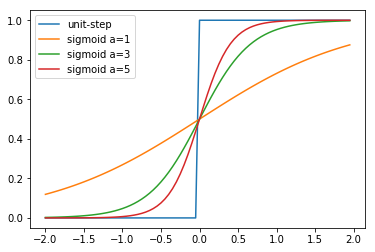

In [81]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(-2., 2., 0.05)
plt.plot(x,unit_step(x),label="unit-step")
# the paramter alpha determines the "steepness" of the sigmoid function
for i in range(1,6,2):
    plt.plot(x,sigmoid(i,x),label="sigmoid a="+str(i))

plt.legend()
plt.show()

Now we want to find an algorithm that updates the weight matrix based on the difference between the value of the above function and the desired result that we want to learn. The algorithm is a form of supervised learning.

The simplest example is trying to model logical functions with two inputs. Lets try the AND function

In [82]:
# input [0,0] output 0
training_set_and = [([0,0],0),([0,1],0),([1,0],0),([1,1],1)]

lets also define a set of weights with the same dimensionality as our input-vector.

In [83]:
weights = [0,0]

Compute the output:

In [84]:
results=[]
for input,desired_out in training_set_and:
    #-0.5 is our threshold here.
    # np.dot does this: x1*w1 + x2*w2 when input = [x1,x2], weights= [w1,w2]
    result = unit_step(np.dot(input,weights)-0.5)
    
    print input, result, desired_out
    results.append((input, result, desired_out))

[0, 0] 0.0 0
[0, 1] 0.0 0
[1, 0] 0.0 0
[1, 1] 0.0 1


one out of four inputs is not correct so we might want to change the weigths there. Let's update the corresponding weights:

In [85]:
for input, outp, desir_out in results:
    error = desir_out-outp
    print error
    if abs(error) > 0.0:
        for i,val in enumerate(input):
            ## 0.2 is the learning rate which we can choose freely between 0 and 1
            #with this formula we update the weights
            weights[i]+= val * error * 0.2
print weights

0.0
0.0
0.0
1.0
[0.20000000000000001, 0.20000000000000001]


Now lets do this procedure until we have no more errors.

In [86]:
weights = [0.0,0.0]
for i in range(100):
    error_count=0
    for input,desired_out in training_set_and:
        result = unit_step(np.dot(input,weights)-0.5)
        print "input:",input, "output:",result, "true result:",desired_out
        error= desired_out-result
        #print error
        if abs(error) > 0.0:
            error_count+=1
            for i,val in enumerate(input):
                ## 0.2 is the learning rate which we can choose freely between 0 and 1
                weights[i]+= val * error * 0.2
    if error_count==0:
        break
    print "#"*40
    print weights
    print "#"*40
    

input: [0, 0] output: 0.0 true result: 0
input: [0, 1] output: 0.0 true result: 0
input: [1, 0] output: 0.0 true result: 0
input: [1, 1] output: 0.0 true result: 1
########################################
[0.20000000000000001, 0.20000000000000001]
########################################
input: [0, 0] output: 0.0 true result: 0
input: [0, 1] output: 0.0 true result: 0
input: [1, 0] output: 0.0 true result: 0
input: [1, 1] output: 0.0 true result: 1
########################################
[0.40000000000000002, 0.40000000000000002]
########################################
input: [0, 0] output: 0.0 true result: 0
input: [0, 1] output: 0.0 true result: 0
input: [1, 0] output: 0.0 true result: 0
input: [1, 1] output: 1.0 true result: 1


Thanks to the correct threshold and a fast learning rate we found the solution already after two iterations. The same threshold won't work for a NAND input. Which makes sense if you think about it. The input 0,0 which should give 1, can never get over a positive threshold value. (if we subtract -0.5 it will always be less than 0) So, do we have to define a different threshold for each function we want to approximate? What if we don't know what a good threshold would be?
One way to circumvent this is adding a constant 1 to the inputs, so that one of the weights is not depending on input and becomes a variable threshold which can also be learned in the algorithm. We call this a bias input.

In [87]:
# input sets and weights have one column more
training_set_nand = [([0,0,1],1),([0,1,1],1),([1,0,1],1),([1,1,1],0)]
weights = [0.0,0.0,0.0]
for i in range(100):
    error_count=0
    for input,desired_out in training_set_nand:
        result = unit_step(np.dot(input,weights)) 
        print "input:",input, "output:",result, "true result:",desired_out
        error= desired_out-result
        #print error
        if abs(error) > 0.0:
            error_count+=1
            for i,val in enumerate(input):
                ## 0.2 is the learning rate which we can choose freely between 0 and 1
                weights[i]+= val * error * 0.2
    if error_count==0:
        break
    print "#"*60
    print weights
    print "#"*60

input: [0, 0, 1] output: 1.0 true result: 1
input: [0, 1, 1] output: 1.0 true result: 1
input: [1, 0, 1] output: 1.0 true result: 1
input: [1, 1, 1] output: 1.0 true result: 0
############################################################
[-0.20000000000000001, -0.20000000000000001, -0.20000000000000001]
############################################################
input: [0, 0, 1] output: 0.0 true result: 1
input: [0, 1, 1] output: 0.0 true result: 1
input: [1, 0, 1] output: 1.0 true result: 1
input: [1, 1, 1] output: 1.0 true result: 0
############################################################
[-0.40000000000000002, -0.20000000000000001, 0.0]
############################################################
input: [0, 0, 1] output: 1.0 true result: 1
input: [0, 1, 1] output: 0.0 true result: 1
input: [1, 0, 1] output: 0.0 true result: 1
input: [1, 1, 1] output: 1.0 true result: 0
############################################################
[-0.40000000000000002, -0.20000000000000001, 0.200

We can find the result after 5 iterations. Now let's plot the decision boundary we found.

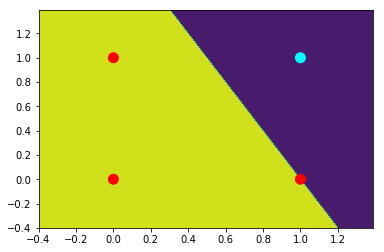

In [88]:
def predict(inp,w):
    #dot product of all but last column + identity of last weight
    return np.dot(inp,w[:-1])+w[-1] > 0
    
def plot_decision(input,prediction_func):
    xx=np.arange(-0.4,1.4,0.01);
    yy=np.arange(-0.4,1.4,0.01);
    zz=np.arange(-0.4,1.4,0.01);
    colors=['cyan','red']
    outp=[out for i,out in input]
    inp=np.array([i for i,out in input])
    
    # create a mesh of all points
    xx, yy = np.meshgrid(xx,yy)
    if (len(inp[0])==4):
        Z = prediction_func(np.c_[xx.ravel(), yy.ravel(),xx.ravel()*yy.ravel()],weights)
    else:
        Z = prediction_func(np.c_[xx.ravel(), yy.ravel()],weights)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    
    # Plot also the training points
    plt.scatter(inp[:, 0], inp[:, 1],c=[colors[i] for i in outp],s=100)
    plt.show()

plot_decision(training_set_nand,predict)

The separating line goes really near at point 1,0, which is bad. If our data were a little noisy the prediction would be wrong. Since we don't change the weights once our algorithm stops making errors, we cannot move this line anymore as soon as a solution on the input data is found.
If we use a sigmoid function to determine our result, we can minimize the error. 

results after 10 iterations:
true result: 1 output: 0.82121598665
true result: 1 output: 0.661058470925
true result: 1 output: 0.671575249259
true result: 0 output: 0.546249442973
results after 100 iterations:
true result: 1 output: 0.997780082664
true result: 1 output: 0.893644232975
true result: 1 output: 0.892590074072
true result: 0 output: 0.150014435396
[-2.0255300892463768, -1.9989481949409849, 3.0672257024083338]


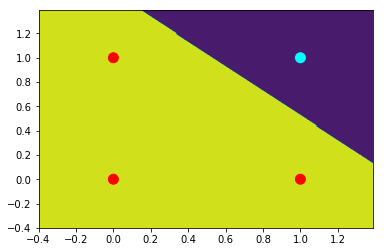

In [89]:
#additional 1 in each input vector
training_set_nand = [([0,0,1],1),([0,1,1],1),([1,0,1],1),([1,1,1],0)]
# weights must be 3 dimensional now like the input vectors
weights = [0.0,0.0,0.0]
for it in range(100):
    if it==9 or it==99:
        print "results after", str(it+1),"iterations:"
    for input,desired_out in training_set_nand:
        result = sigmoid(2,np.dot(input,weights))
        if it==9 or it==99:
            print "true result:",desired_out, "output:",result
        error= desired_out-result
        if abs(error) > 0.0:
            for i,val in enumerate(input):
                ## 0.2 is the learning rate which we can choose freely between 0 and 1
                weights[i]+= val * error * 0.2
print weights
plot_decision(training_set_nand,predict)

As you can see, we can't output the exact result. We only approach it. The decision boundary approaches the best separation line between the classes with more and more iterations. If you take a sigmoid with a steeper slope it will approach faster. You don't want to be too steep though, because then it is possible that you miss the optimal slope since the error becomes too small. 
This kind of Perceptron is in the same as a logistic regression model (also called maximum entropy classifier). Another name for it could be a single-layer neural network.

[-0.23648972 -0.23648972  0.41924733]


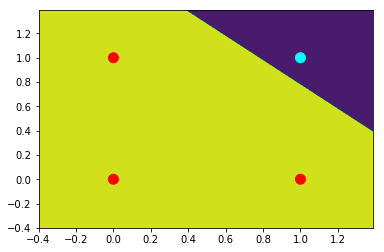

In [90]:
from sklearn.linear_model import LogisticRegression
X= np.array([inp for inp,outp in training_set_nand])
y= np.array([outp for inp,outp in training_set_nand])
h = LogisticRegression()
h.fit(X, y)
weights=h.coef_[0]
print weights
plot_decision(training_set_nand,predict)

There are 2 out of 16 binary logical functions which we can't learn with a perceptron. XOR and XNOR. The exclusive or and its counterpart. On the scatterplot you can see that they are in fact not linearly separable.

results after 10 iterations:
true result: 0 output: 0.507222476211
true result: 1 output: 0.427012120676
true result: 1 output: 0.449014859541
true result: 0 output: 0.585471631259
results after 100 iterations:
true result: 0 output: 0.555193834816
true result: 1 output: 0.444681103616
true result: 1 output: 0.444679408541
true result: 0 output: 0.555373371174


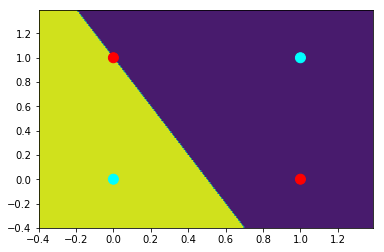

In [91]:
training_set_xor = [([0,0,1],0),([0,1,1],1),([1,0,1],1),([1,1,1],0)]
# weights must be 3 dimensional now like the input vectors
weights = [0.0,0.0,0.0]
for it in range(100):
    if it==9 or it==99:
        print "results after", str(it+1),"iterations:"
    for input,desired_out in training_set_xor:
        result = sigmoid(2,np.dot(input,weights))
        if it==9 or it==99:
            print "true result:",desired_out, "output:",result
            
        error= desired_out-result
        if abs(error) > 0.0:
            for i,val in enumerate(input):
                ## 0.2 is the learning rate which we can choose freely between 0 and 1
                weights[i]+= val * error * 0.2

plot_decision(training_set_xor,predict)

nearly no change in 100 iterations despite the clear error. the weights are changing back and forth. From the plot it gets clear that there exists no linear boundary that can separate the two classes.

We can model this non-linearity by giving the perceptron a third "dummy-input" x3, which is the product of x1*x2

results after 10 iterations:
true result: 0 output: 0.540264342065
true result: 1 output: 0.544554542942
true result: 1 output: 0.558262717295
true result: 0 output: 0.340155776913
results after 100 iterations:
true result: 0 output: 0.218376398044
true result: 1 output: 0.859214898594
true result: 1 output: 0.857842151145
true result: 0 output: 0.0916735558048


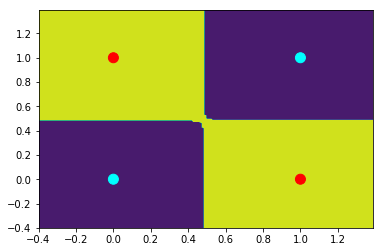

In [92]:
#input = [x1 , x1 , x1*x2 , 1]
training_set_xor = [([0,0,0,1],0),([0,1,0,1],1),([1,0,0,1],1),([1,1,1,1],0)]
# weights must be 4 dimensional now like the input vectors
weights = [0.0,0.0,0.0,0.0]
for it in range(10000):
    if it==9 or it==99:
        print "results after", str(it+1),"iterations:"
    for input,desired_out in training_set_xor:
        result = sigmoid(np.dot(input,weights),2)
        if it==9 or it==99:
            print "true result:",desired_out, "output:",result
            
        error= desired_out-result
        if abs(error) > 0.0:
            for i,val in enumerate(input):
                ## 0.2 is the learning rate which we can choose freely between 0 and 1
                weights[i]+= val * error * 0.2

# I have to figure out how I can plot this :P
plot_decision(training_set_xor,predict)

We modeled a non-linear classifier. Lets look at it in a 3d environment.

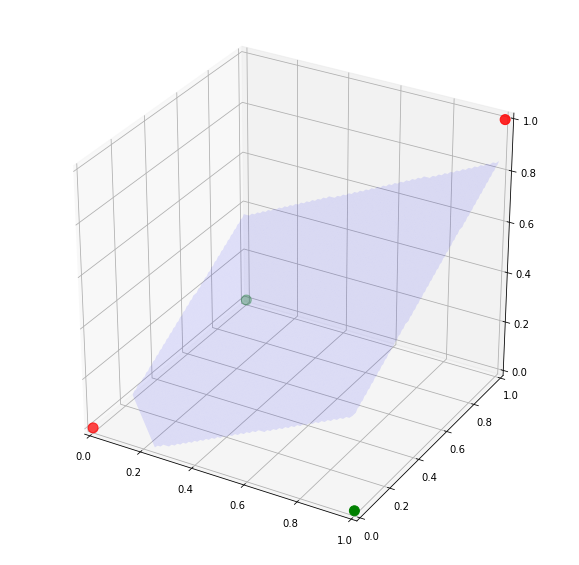

In [93]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

input = np.array([inp for inp,outp in training_set_xor])
colors=['red','green']
output=[outp for inp,outp in training_set_xor]
xx=np.arange(-0.4,1.4,0.02)
yy=np.arange(-0.4,1.4,0.02)
zz=np.arange(-0.4,1.4,0.02)
    # create a mesh of all points
xx, yy, zz = np.meshgrid(xx,yy,zz)
Z = predict(np.c_[xx.ravel(), yy.ravel(),zz.ravel()],weights)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
cset = ax.scatter(input[:, 0], input[:, 1], input[:, 2],c=[colors[i] for i in output],s=100)

verts, faces = measure.marching_cubes(Z, 0)
# Scale and transform to actual size of the interesting volume
verts = verts / 90.0

# and create a mesh to display
mesh = Poly3DCollection(verts[faces],
                        facecolor='blue', alpha=0.1)
ax.add_collection3d(mesh)
ax.set_xlim((0.0, 1.0))
ax.set_ylim((0.0, 1.0))
ax.set_zlim((0.0, 1.0))
fig.show()